# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [3]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [4]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
ys = list(map(g, xs)) # targets

ts = list(map(f, xs)) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

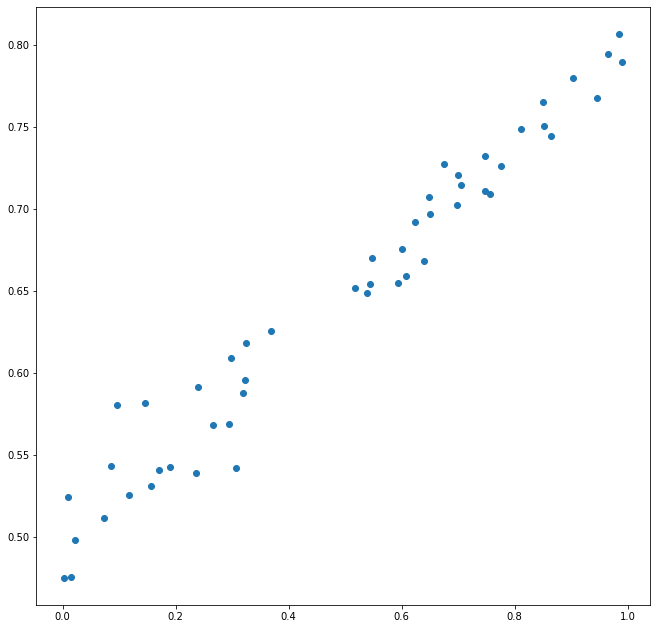

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [10]:
def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    #################################
    # TODO: Implement this function #
    #################################
    sum = 0
    for i in range(len(ys)):
      sum += (ys[i]-ps[i])**2
    return (1/len(ys)) * sum

Please take a while to (roughly) guess the output before executing the cell below.

In [11]:
l2_loss(ys, ts)

0.00034597116577475003

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [46]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.1 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

for i in range(n_epochs):
    #############################
    # TODO: Fill in the details #
    #############################
    loss = evaluate(a, b, xs, ys)
    losses.append(loss)
    sum_a = 0
    sum_b = 0
    for j in range(len(xs)):
      sum_a += -2 * xs[j] *(-b-a*xs[j]+ ys[j])
      sum_b += -2 * (-b - a*xs[j] + ys[j])
    a = a - lr * (1/len(xs)) * sum_a
    b = b - lr * (1/len(xs)) * sum_b
  
    print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b))

Iter:   0 Loss: 0.42422135 a:  0.06876, b:  0.12895
Iter:   1 Loss: 0.23756411 a:  0.12030, b:  0.22536
Iter:   2 Loss: 0.13311473 a:  0.15894, b:  0.29742
Iter:   3 Loss: 0.07466674 a:  0.18795, b:  0.35128
Iter:   4 Loss: 0.04195993 a:  0.20974, b:  0.39152
Iter:   5 Loss: 0.02365723 a:  0.22614, b:  0.42157
Iter:   6 Loss: 0.01341472 a:  0.23849, b:  0.44400
Iter:   7 Loss: 0.00768250 a:  0.24783, b:  0.46073
Iter:   8 Loss: 0.00447415 a:  0.25490, b:  0.47320
Iter:   9 Loss: 0.00267810 a:  0.26027, b:  0.48248
Iter:  10 Loss: 0.00167236 a:  0.26438, b:  0.48938
Iter:  11 Loss: 0.00110889 a:  0.26754, b:  0.49449
Iter:  12 Loss: 0.00079290 a:  0.26999, b:  0.49828
Iter:  13 Loss: 0.00061543 a:  0.27190, b:  0.50106
Iter:  14 Loss: 0.00051549 a:  0.27342, b:  0.50310
Iter:  15 Loss: 0.00045895 a:  0.27463, b:  0.50458
Iter:  16 Loss: 0.00042671 a:  0.27561, b:  0.50565
Iter:  17 Loss: 0.00040808 a:  0.27643, b:  0.50641
Iter:  18 Loss: 0.00039709 a:  0.27712, b:  0.50693
Iter:  19 Lo

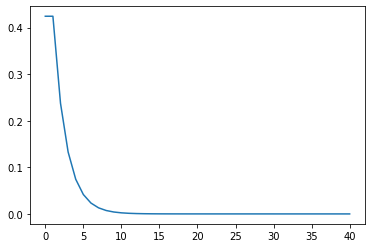

In [47]:
plt.plot(losses)

Let's now visually asses how we do on training data

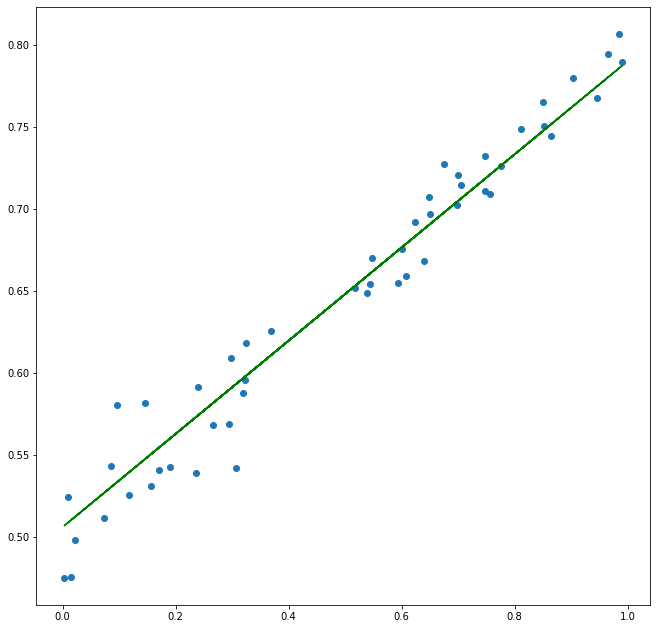

In [48]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

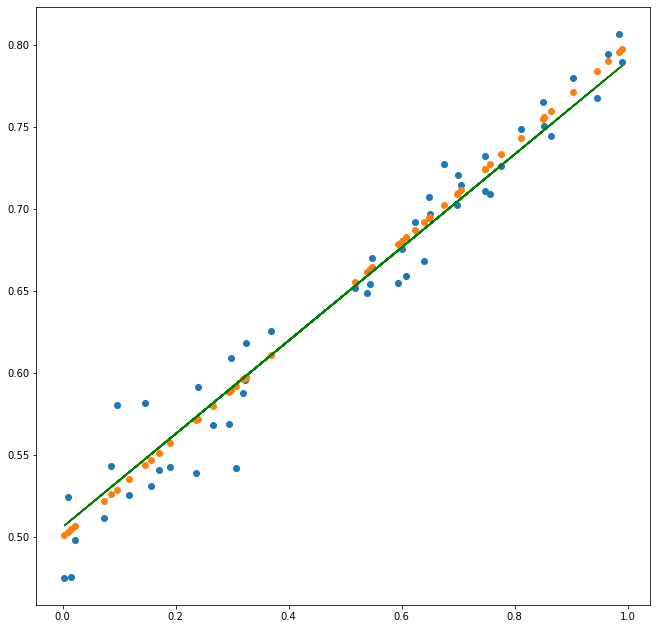

In [50]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')

################################################################
# TODO: Add the (unobserved) ground truth, i.e. ts to the plot #
################################################################
plt.scatter(xs, ts)
plt.show()

Let's check our implementation vs. the one in sklearn

In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(sk_loss, sk_a, sk_b))

Loss: 0.00033954 a:  0.30003, b:  0.49745
